# Part-I: GDP Analysis of the Indian States

# Part I-A

In [2]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os
import numpy as np

In [3]:
#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# For the analysis below, use the Data I-A.

In [4]:
#Load the DataSet
df = pd.read_csv('data_1.csv')

In [5]:
df

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,654294.00,NaN,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [6]:
#Break the original data into two Dataframes Based on 'Items Description'
#We will analyse these DataSets Seperately
df1 = df[df['Items  Description'] == "GSDP - CURRENT PRICES (` in Crore)"]
df2 = df[df['Items  Description'] == "(% Growth over previous year)"]

In [7]:
df1

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.0,NaN,NaN,NaN,290140.0,NaN,NaN,547396.0,...,654294.0,NaN,NaN,NaN,NaN,NaN,NaN,622385.0,29557.0,15251028.0


In [8]:
df2

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99
10,(% Growth over previous year),2016-17,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,...,13.67,NaN,NaN,NaN,NaN,NaN,NaN,12.76,11.40,11.52


# First, you need to load the data in Python properly and then clean it. This also involves the treatment of missing values, you can choose to drop the row or column as well. Remember this will affect your next analysis and results drastically.

In [9]:
#Remove all rows with more than 50% missing values.
df1 = df1[df1.isnull().sum(axis=1) <= len(df1.columns.tolist()) // 2]
df2 = df2[df2.isnull().sum(axis=1) <= len(df2.columns.tolist()) // 2]

#Remove columns with all missing values
df1 = df1.dropna(axis=1, how='all')
df2 = df2.dropna(axis=1, how='all')

In [10]:
df1

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,751485.0,359433.0,19208.0,724049.0,115523.0,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,855481.0,401493.0,21663.0,822903.0,131835.0,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,971090.0,452186.0,25593.0,944146.0,149817.0,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,1092564.0,511178.0,29667.0,1043371.0,161985.0,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,1212668.0,575631.0,NaN,1153795.0,184091.0,NaN,30304.0,551963.0,26533.0,13675331.0


In [11]:
df2

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.84,11.70,12.78,13.65,14.12,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


# Plot a graph for rows " % Growth over previous year" for all the states (not union territories) whose data is available, use as much data as possible for this exercise. Use the best fit line to represent the growth for each state. Draw a similar line graph for the nation as well.

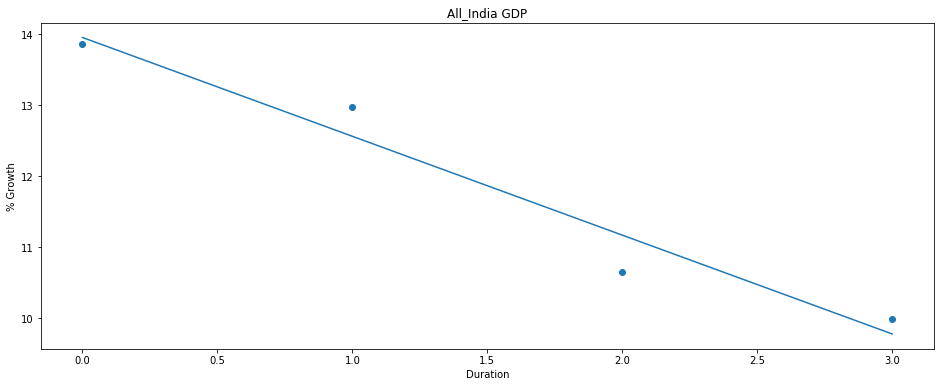

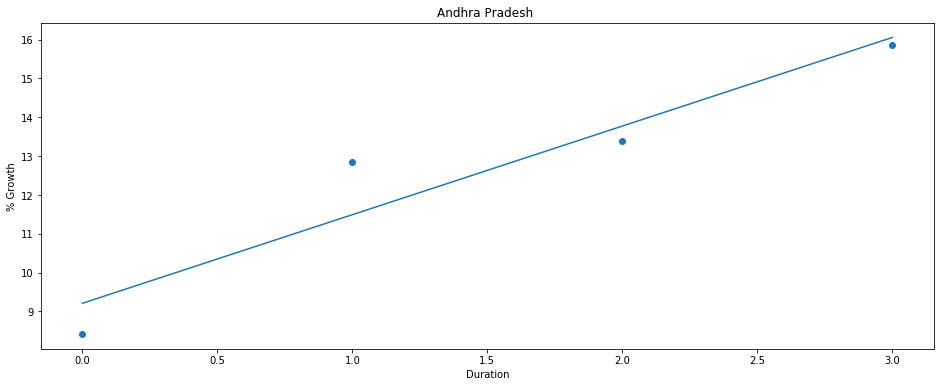

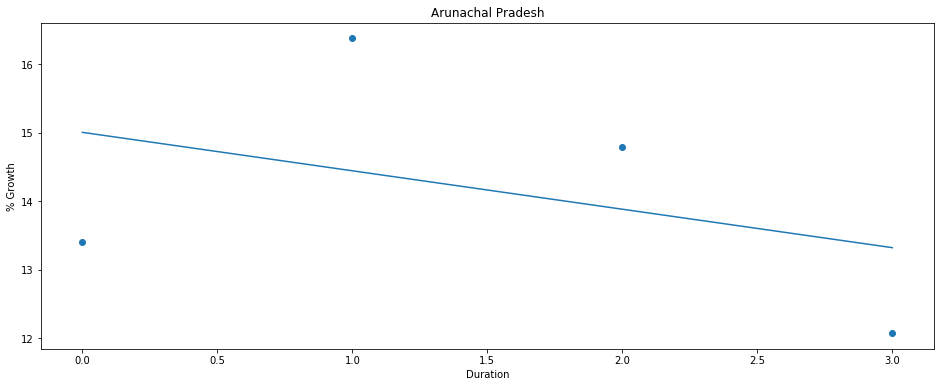

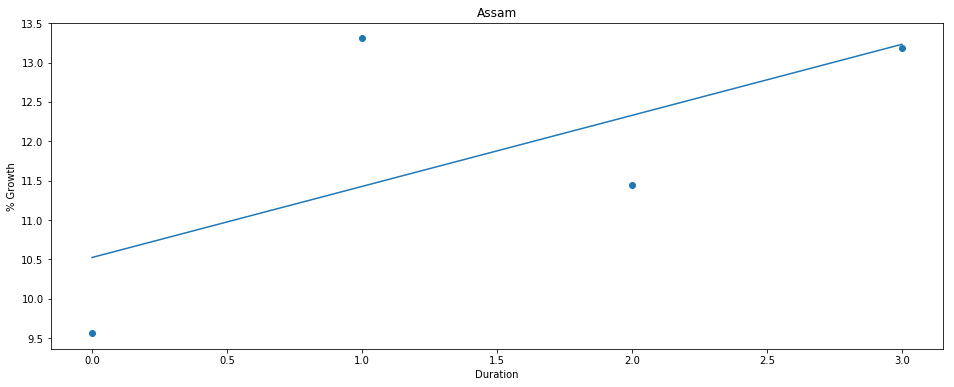

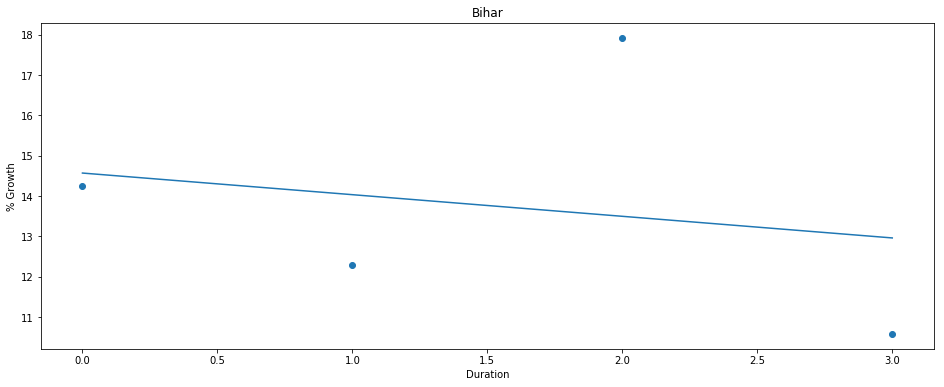

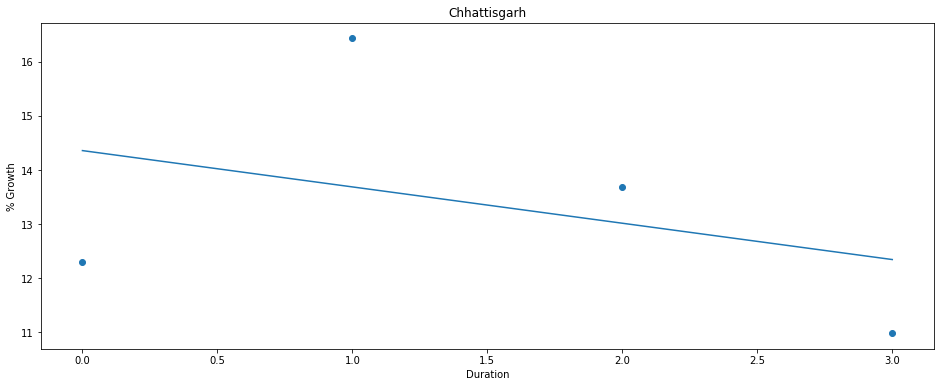

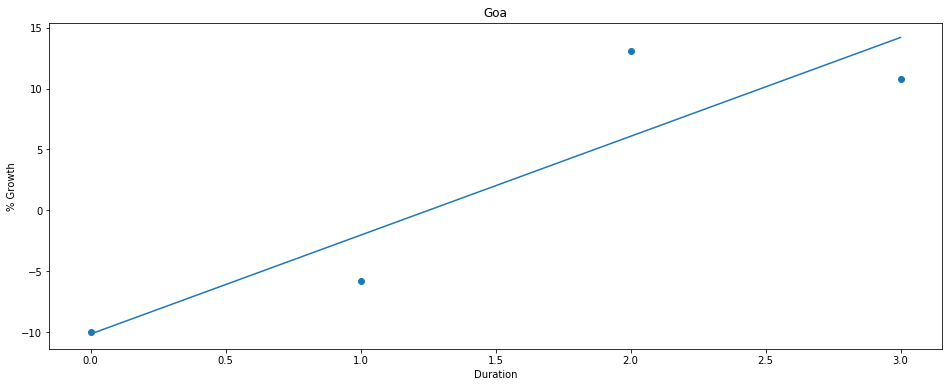

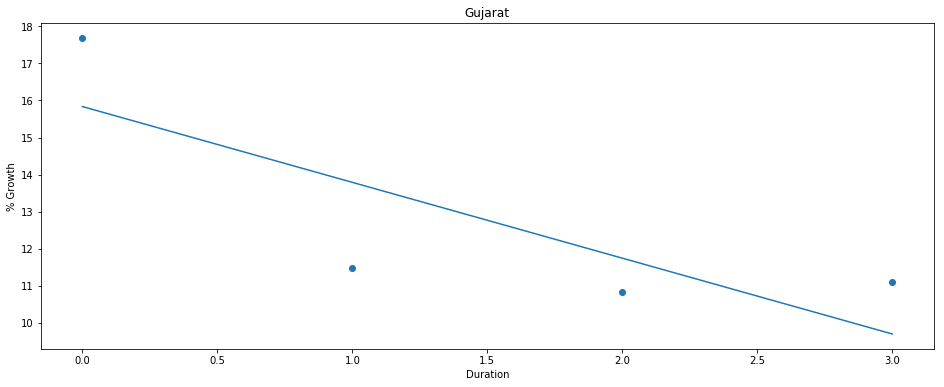

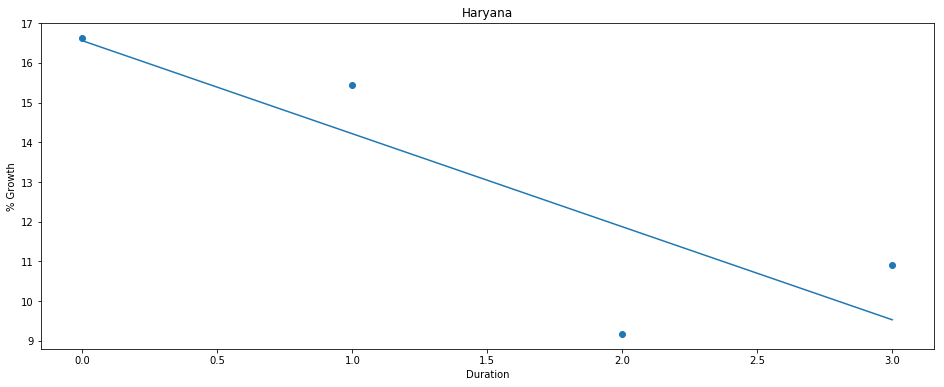

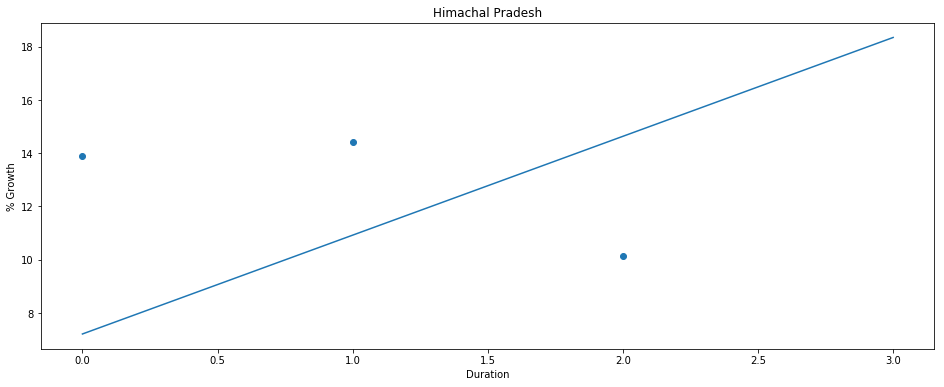

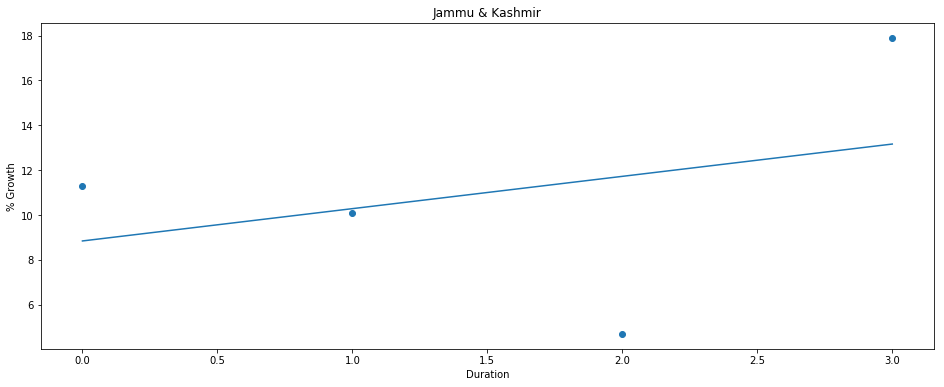

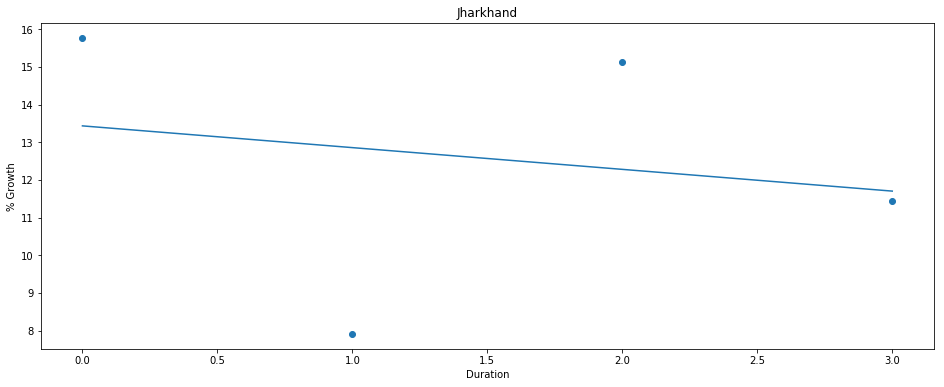

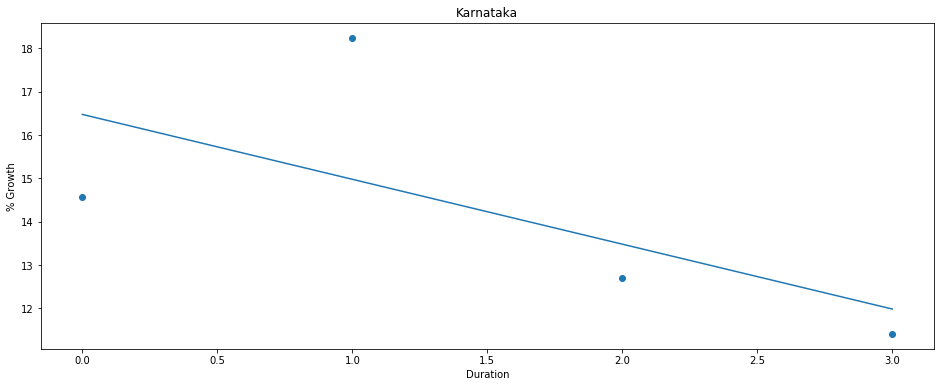

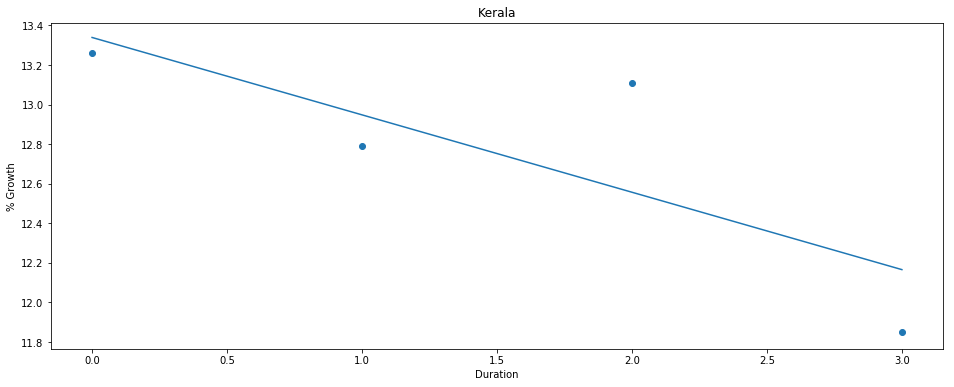

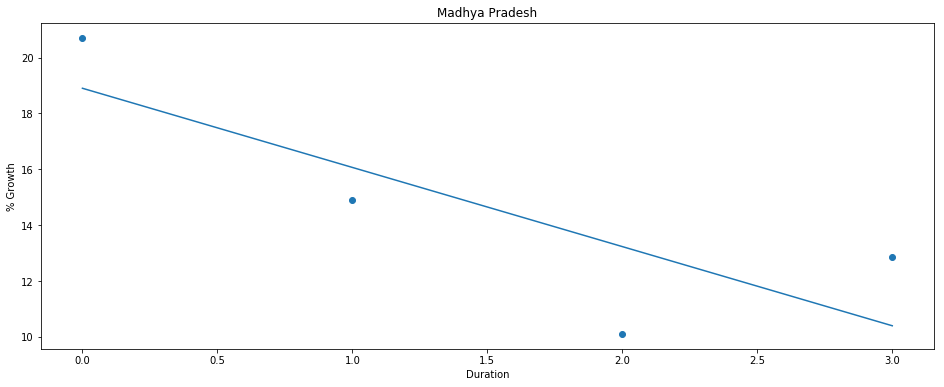

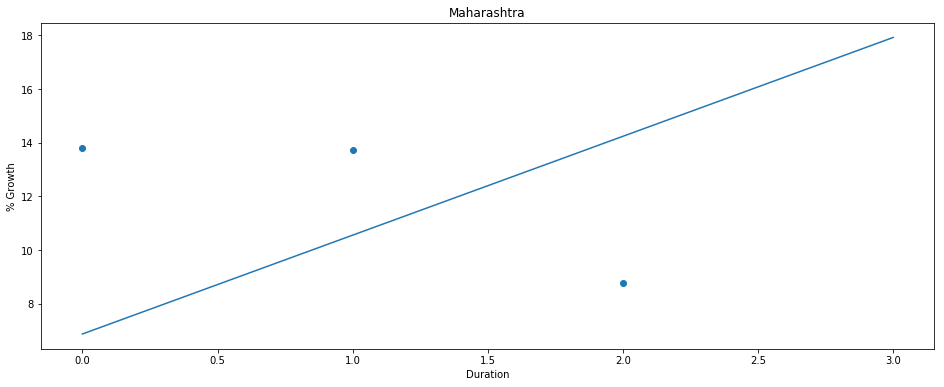

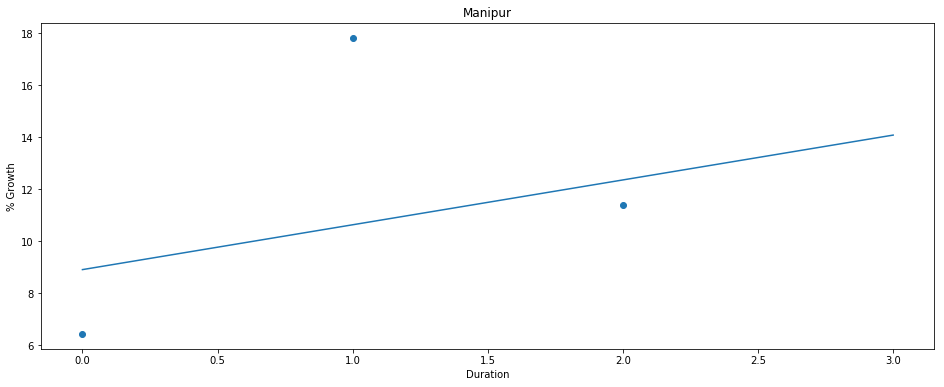

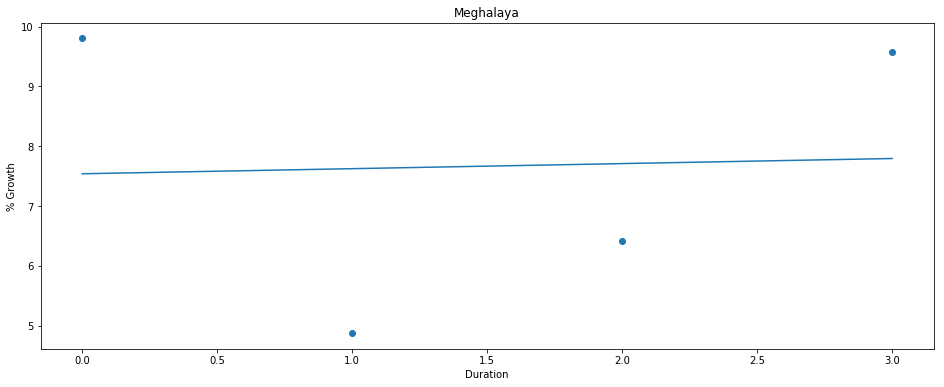

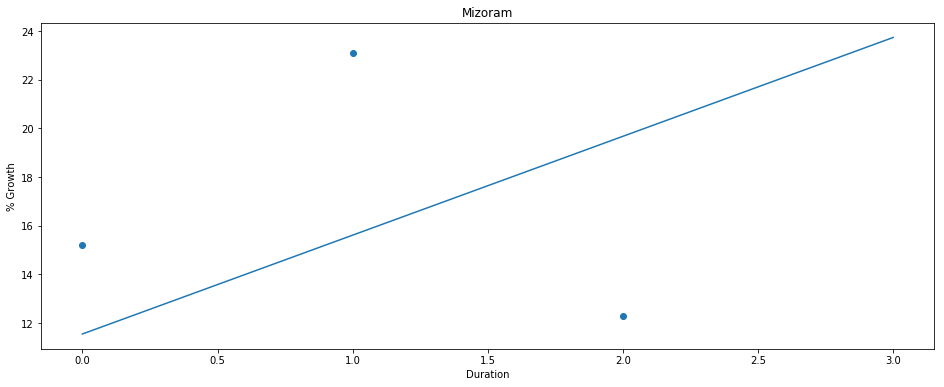

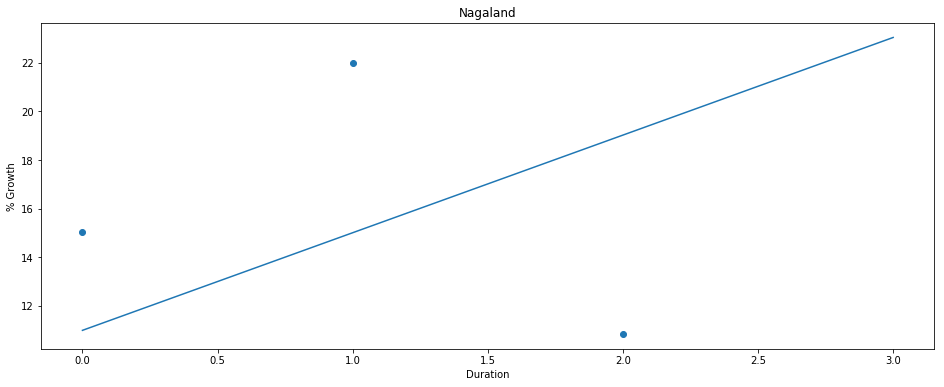

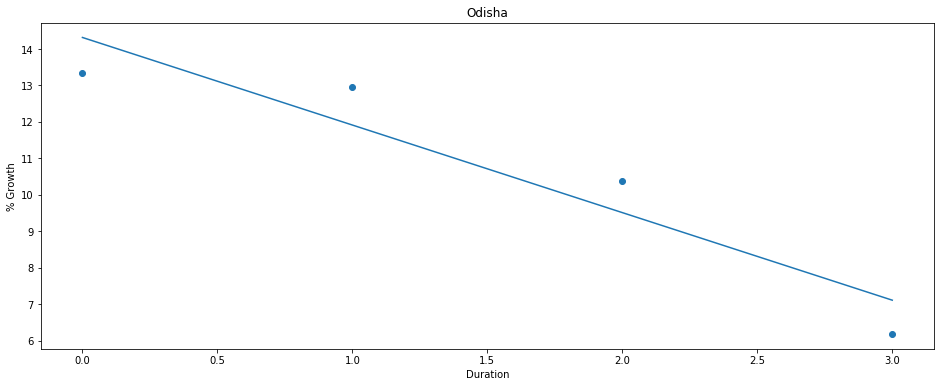

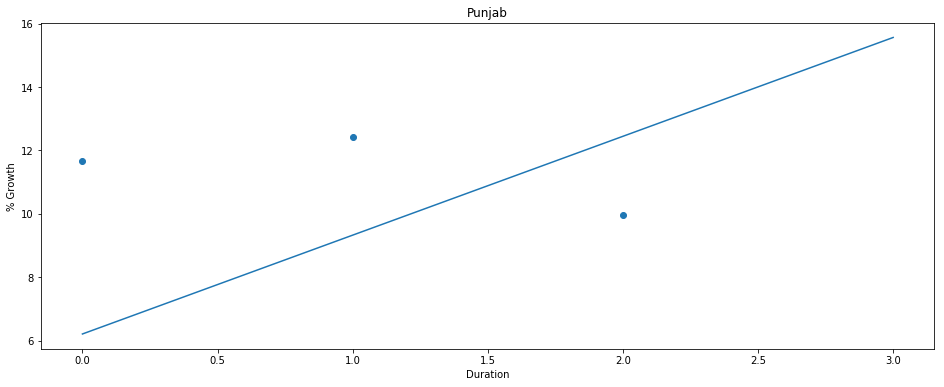

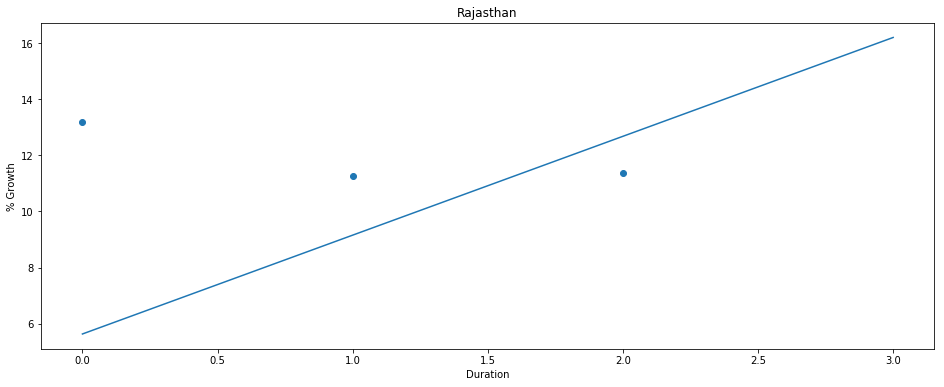

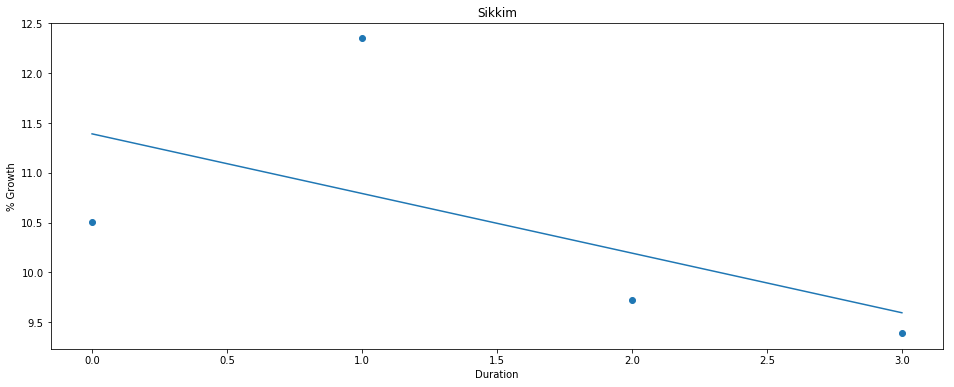

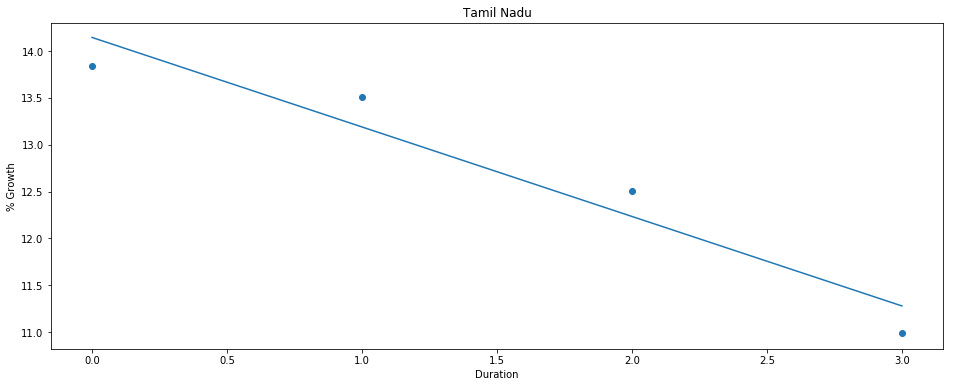

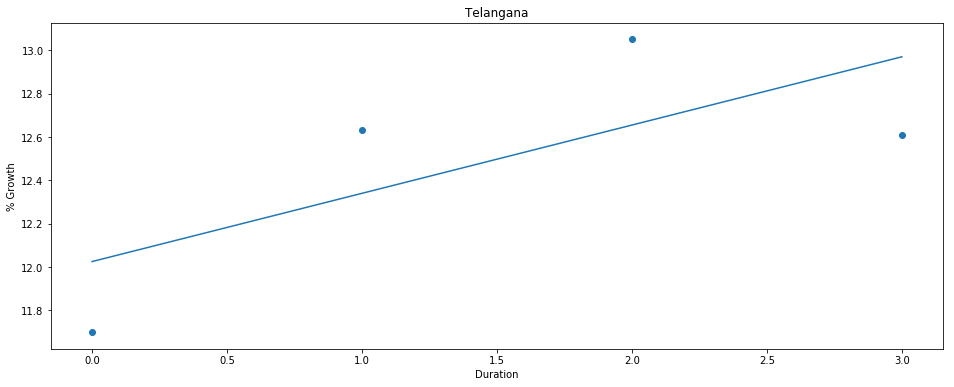

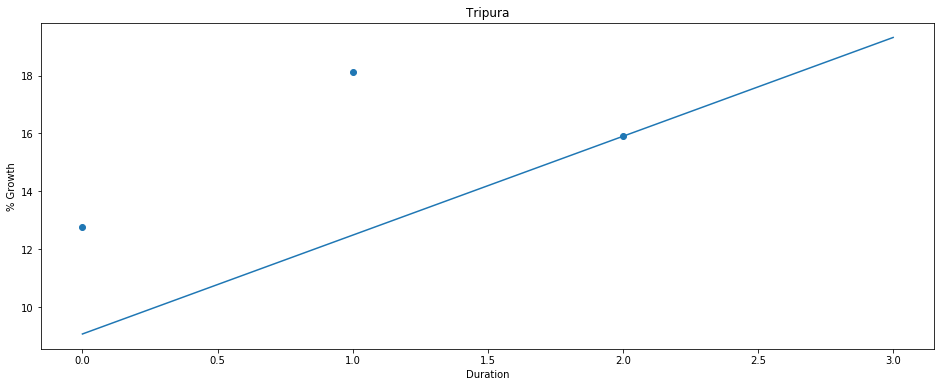

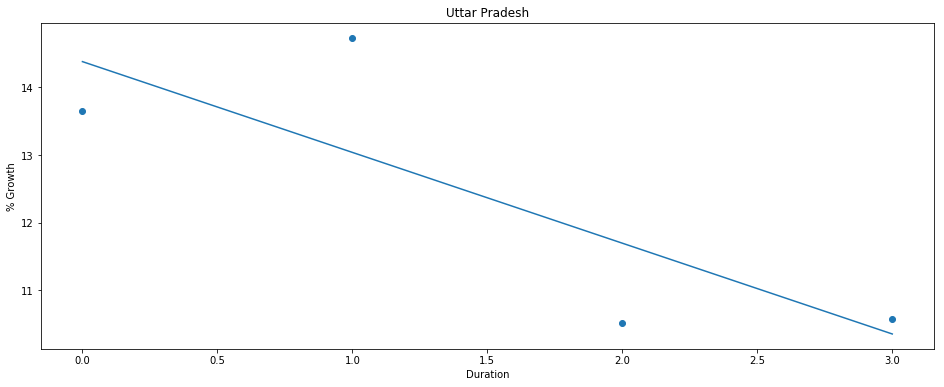

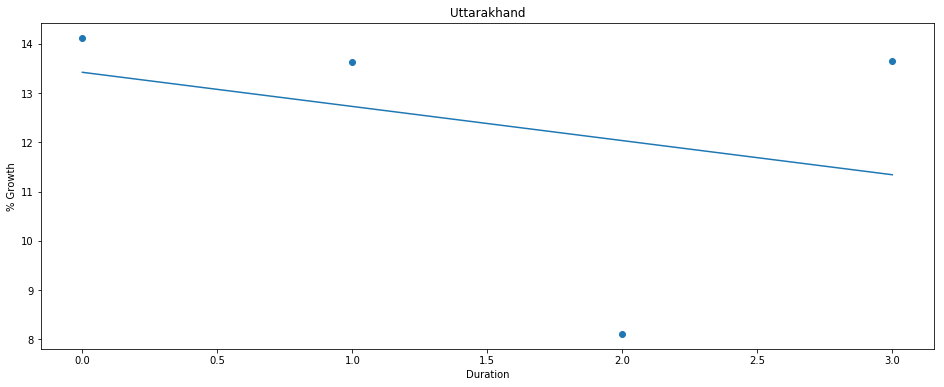

In [12]:
#Create a Serial Number columns 
df2['S.No.'] = np.arange(len(df2))

#Select only columns pertaining to a state
columns = df2.columns.tolist()[2: -1]

#Filter all union territories.
UT = ['Andaman & Nicobar Islands',
'Lakshadweep',
'Puducherry',
'Chandigarh',
'Daman & Diu',
'New Delhi',
'Delhi']

#dictionary to store the rate of growth
rate_of_growth = {}

states = list(set(columns) - set(UT))
states = sorted(states)

#Plot a scatter plot for each state
for col in states:
    plt.figure(figsize=(16, 6))
    plt.title(col)
    plt.xlabel("Duration")
    plt.ylabel("% Growth")
    plt.scatter(x='S.No.', y=col, data=df2[['S.No.', col]])
    m, c = np.polyfit(df2['S.No.'], df2[col], 1)
    plt.plot(df2['S.No.'], m * df2['S.No.'] + c)
    rate_of_growth[col] = m

# How will you compare the growth rates of any two states?

In [13]:
#Using the slope of the best fit line. The higher the slope the more the rate if growth

# Which states have been growing consistently fast, and which ones have been struggling? Rank top 3 fastest and 3 slowest-growing states.

In [14]:
#Sort in descending order of slope
rate_of_growth = [(k, rate_of_growth[k]) for k in sorted(rate_of_growth, key=rate_of_growth.get, reverse=True)]
print(rate_of_growth)

[('Goa', 8.120000000000005), ('Mizoram', 4.062370877068851), ('Nagaland', 4.016936465943738), ('Himachal Pradesh', 3.712258650163575), ('Maharashtra', 3.685532525972332), ('Rajasthan', 3.5225031684057533), ('Tripura', 3.4155986716407836), ('Punjab', 3.1189386931179928), ('Andhra Pradesh ', 2.2809999999999993), ('Manipur', 1.7238350103351374), ('Jammu & Kashmir', 1.4409999999999976), ('Assam', 0.9029999999999957), ('Telangana', 0.3149999999999967), ('Meghalaya', 0.08499999999999912), ('Kerala', -0.3910000000000037), ('Bihar', -0.536000000000005), ('Arunachal Pradesh', -0.5610000000000038), ('Jharkhand', -0.5770000000000036), ('Sikkim', -0.599000000000001), ('Chhattisgarh', -0.6710000000000035), ('Uttarakhand', -0.6930000000000022), ('Tamil Nadu', -0.9550000000000034), ('Uttar Pradesh', -1.3430000000000017), ('All_India GDP', -1.3930000000000031), ('Karnataka', -1.496000000000004), ('Gujarat', -2.0450000000000044), ('Haryana', -2.343000000000003), ('Odisha', -2.403000000000004), ('Madhya

In [15]:
#As we can see from the slope of the line that Goa, Mizoram and Nagaland are fastest growing 
#while Madhya Pradesh, Odisha and Haryana as slowest growing

# What is the Nation's growth rate?

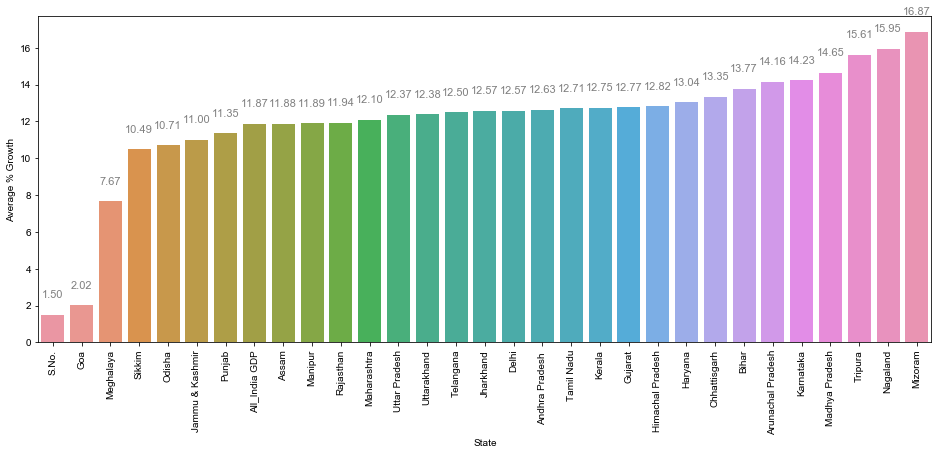

In [16]:
#Transpose the DataFrame for better analysis
df2_t = df2.transpose()

#Remove First Row as it is understood as the DataSet is for GSDP - CurrentPrices
df2_t = df2_t[1:]

#Reset the index.
df2_t = df2_t.reset_index()

#Make the first row as the header
new_header = df2_t.iloc[0] #grab the first row for the header
df2_t = df2_t[1:] #take the data less the header row
df2_t.columns = new_header #set the header row as the df header 

#Change the column name to State
df2_t.rename(columns = {"Duration": "State"}, inplace=True)

#Create a new column for average growth.
df2_t['Average % Growth'] = df2_t[df2_t.columns.tolist()[1:]].mean(axis=1)

#Remove all rows with NULL average.
df2_t = df2_t[~df2_t['Average % Growth'].isnull()]

#Sort Values by Average % Growth
df2_t.sort_values(by="Average % Growth", inplace=True)

#Filter all union territories.
UT = ['Andaman & Nicobar Islands',
'Lakshadweep',
'Puducherry',
'Chandigarh',
'Daman & Diu',
'New Delhi']
df2_t= df2_t[~df2_t['State'].isin(UT)]

#Plot a Bar Chart in Seaborn
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
sns.set(style="whitegrid")
ax = sns.barplot(x="State", y="Average % Growth", data=df2_t)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
    textcoords='offset points')

In [19]:
#Nation's growth rate is 11.87%

# What has been the growth rate of your home state, and how does it compare to the national growth rate?

In [20]:
#Home State = Uttar Pradesh
#Growth Rate = 12.37%
#The growth rate of Uttar Pradesh has been slightly above national average. 

# Plot the total GDP of the states for the year 2015-16

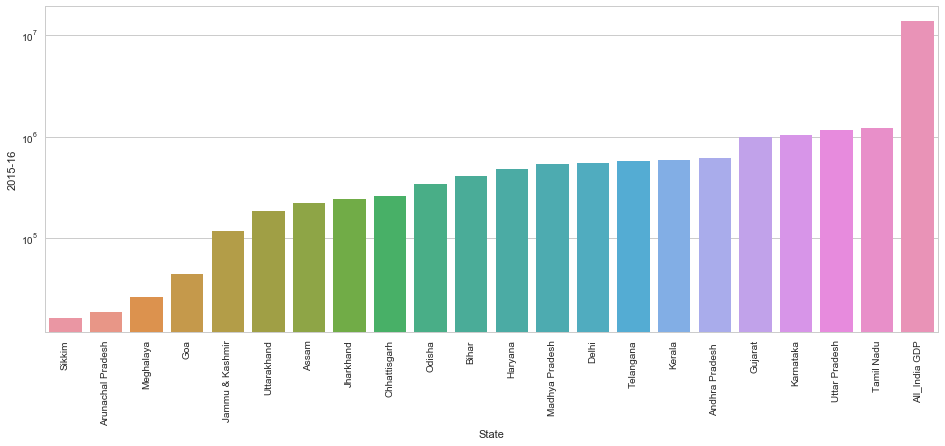

In [21]:
#Break the original data into two Dataframes Based on 'Items Description'
df1 = df[df['Items  Description'] == "GSDP - CURRENT PRICES (` in Crore)"]

#Transpose the DataFrame for better analysis
df1_t = df1.transpose()

#Remove First Row as it is understood as the DataSet is for GSDP - CurrentPrices
df1_t = df1_t[1:]

#Reset the index.
df1_t = df1_t.reset_index()

#Make the first row as the header
new_header = df1_t.iloc[0] #grab the first row for the header
df1_t = df1_t[1:] #take the data less the header row
df1_t.columns = new_header #set the header row as the df header 

#Change the column name to State
df1_t.rename(columns = {"Duration": "State"}, inplace=True)

df1_t = df1_t[['State', '2015-16']]

#Filter all union territories.
UT = ['Andaman & Nicobar Islands',
'Lakshadweep',
'Puducherry',
'Chandigarh',
'Daman & Diu',
'New Delhi']
df1_t= df1_t[~df1_t['State'].isin(UT)]

df1_t.sort_values(by='2015-16', inplace=True)

df1_t = df1_t.dropna(axis='rows')

#Plot a Bar Chart in Seaborn
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
sns.set(style="whitegrid")
ax = sns.barplot(x="State", y="2015-16", data=df1_t)
ax.set_yscale("log")

# Which Plot will you use for this? Why? (Remeber to plot the graph in a way such as it is easier to read and compare)

In [22]:
#A simple bar plot would suffice. This is because we are dealing with a categorical data vs quantitative data.
#We just need to find that for every state (non-numeric), what is the GDP.

# Identify the top 5 and the bottom 5 states based on total GDP.

In [23]:
#Bottom 5 states
df1_t.head(5)
#Sikkim, AP, Meghalaya, Goa, JnK 

,State,2015-16
23,Sikkim,16637
2,Arunachal Pradesh,18784
17,Meghalaya,26745
6,Goa,45002
10,Jammu & Kashmir,118387


In [24]:
#Top 5 states
df1_t.tail(6)
# AP, Gujarat, Karnataka, UP, TN
# Not we took last 6 as we had to ignore nation's GDP magnitude.

,State,2015-16
1,Andhra Pradesh,609934
7,Gujarat,994316
12,Karnataka,1.02707e+06
27,Uttar Pradesh,1.1538e+06
24,Tamil Nadu,1.21267e+06
34,All_India GDP,1.36753e+07


In [25]:
#Indian States in Increasing order of GDP
df1_t

,State,2015-16
23,Sikkim,16637
2,Arunachal Pradesh,18784
17,Meghalaya,26745
6,Goa,45002
10,Jammu & Kashmir,118387
28,Uttarakhand,184091
3,Assam,224234
11,Jharkhand,241955
5,Chhattisgarh,260776
20,Odisha,341887


# What insights can you draw from this graph? What states are performing poorly? (Remember: this will not be solely based on total GDP)

In [26]:
df_analysis = df1_t.merge(pd.DataFrame(rate_of_growth, columns=['State', 'Growth']), on='State')
df_analysis

,State,2015-16,Growth
0,Sikkim,16637,-0.599
1,Arunachal Pradesh,18784,-0.561
2,Meghalaya,26745,0.085
3,Goa,45002,8.120
4,Jammu & Kashmir,118387,1.441
5,Uttarakhand,184091,-0.693
6,Assam,224234,0.903
7,Jharkhand,241955,-0.577
8,Chhattisgarh,260776,-0.671
9,Odisha,341887,-2.403


In [27]:
#From the above merged dataframe and the two plots we can conclude that each states represent a unique characteristic.
#Sikkim doesn't have a good GDP not its improving.
#Goa doesn't have a good GDP but its improving drastically which is a great sign.
#The nation's GDP is on a decline which is a cause of worry.
#Gujarat has a high GDP but is declining sharply and so on...

# For the analysis below, use Data I-B. You can also use Data I-B along with Data I-A if required. Also, perform the analysis only for the duration 2014-15. Filter out the union territories (Delhi, Chandigarh, Andaman and Nicobar Islands, etc.) for further analysis, as they are governed directly by the central, not state governments.


In [28]:
#Path to DataSet
path = r'states'
all_files = glob.glob(path + "/*.csv")
sub_sectors = []
li = []
for fileName in all_files:
    df = pd.read_csv(fileName, index_col=None, header=0, encoding = "ISO-8859-1")
    df = df[['S.No.', 'Item', '2014-15']]
    df = df[~df["S.No."].str.contains("\.")]
    df = df.T
    df = df[1:]
    new_header = df.iloc[0] 
    df = df[1:]
    df.columns = new_header 
    sub_sectors = df.columns.tolist()
    df['State'] = fileName.split('-')[1]
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

UT = ['Andaman & Nicobar Islands',
'Lakshadweep',
'Puducherry',
'Chandigarh',
'Daman & Diu',
'New Delhi',
'Delhi']
frame = frame[~frame['State'].isin(UT)]
frame.sort_values(by='Per Capita GSDP (Rs.)', inplace=True)

# Plot the GDP per capita for all the states.

In [29]:
#Prepared DataSet
frame

,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Gross State Domestic Product,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Population ('00),...,Public administration,"Real estate, ownership of dwelling & professional services",Secondary,State,Subsidies on products,TOTAL GSVA at basic prices,Taxes on Products,Tertiary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting"
4,7951890,3449763,345168,1178022,37391988,2189965,68107,4587589,33954,1101240,...,2078171,3740641,5984896,Bihar,2006421,36184863,3213546,22179969,7448373,3147173
17,25097754,11256450,2030625,3392275,104337115,12261649,901501,5034623,49450,2109940,...,6152124,14548185,25548724,Uttar_Pradesh,3287219,97516938,10107396,45968959,9437243,7404509
12,383140,NaN,NaN,NaN,1.80428e+06,NaN,NaN,NaN,58442,30873,...,NaN,NaN,220173,Manipur,69137,1.78065e+06,92766,1.17733e+06,NaN,NaN
3,3855548,1733568,296587,543651,19809800,2002936,1471149,1795658,60621,326780,...,1373611,1412466,4033091,Assam,582406,18666897,1725309,9307109,2987155,1194568
29,3211065,1789834,337489,551441,21710718,4114148,2037289,1375410,62091,349660,...,1088325,1656784,6241471,Jharkhand,411619,19623166,2499171,8133341,1991359,1470022
8,16235647,4403151,1272905,1988794,48198169,4368833,1618373,2747805,62989,765180,...,2497321,2660123,10044889,Madhya_Pradesh,2102800,46016269,4284700,18117360,5357515,2865802
2,6422978,2402396,833067,1065147,32197092,5754229,2586328,2340603,73979,435220,...,1318221,2348714,8989693,Odisha,1209349,30255256,3151184,12256258,3149555,2034016
14,366521,150256,54473,64091,2.44081e+06,433213,84529,214211,76228,32020,...,239782,150409,637942,Meghalaya,62112,2.28965e+06,213272,1.20066e+06,383974,148189
13,799825,177899,77870,86094,2.96666e+06,228625,142391,323287,77358,38350,...,338244,190704,484393,Tripura,94002,2.91132e+06,149345,1.48471e+06,390423,155956
0,15044394,5353326,1122888,1827413,61219447,6552580,4069385,4164287,84837,721610,...,2460364,6451997,13028794,Rajasthan,2333442,58158386,5394503,26015812,7297290,3814461


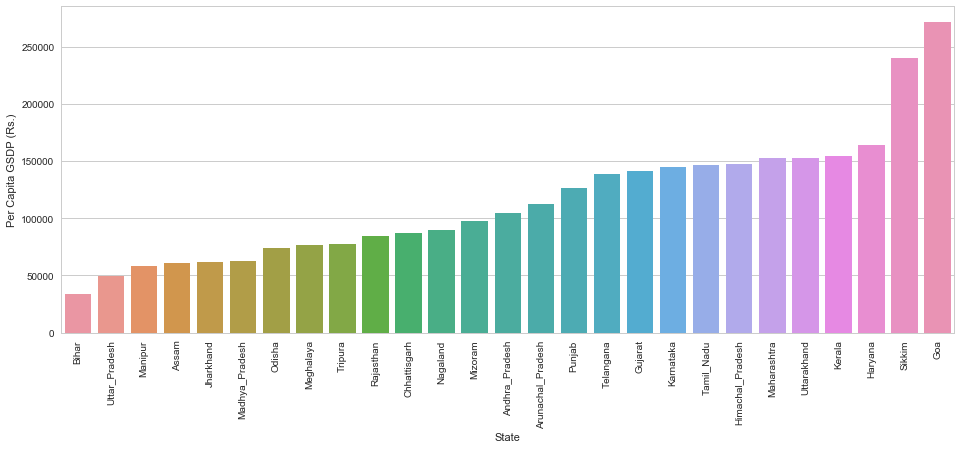

In [30]:
#Sort By GSDP for better plot
sorted_gdp = frame.sort_values(by='Per Capita GSDP (Rs.)')
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
sns.set(style="whitegrid")
ax2 = sns.barplot(x="State", y="Per Capita GSDP (Rs.)", data=sorted_gdp)

# Identify the top 5 and the bottom 5 states based on the GDP per capita.

In [31]:
#States with lowest Per Capita GSDP (Bottom 5)
frame.head(5)[['State', 'Per Capita GSDP (Rs.)']]

,State,Per Capita GSDP (Rs.)
4,Bihar,33954
17,Uttar_Pradesh,49450
12,Manipur,58442
3,Assam,60621
29,Jharkhand,62091


In [32]:
#States with highest Per Capita GSDP (Top 5)
frame.tail(5)[['State', 'Per Capita GSDP (Rs.)']]

,State,Per Capita GSDP (Rs.)
23,Uttarakhand,153076
7,Kerala,154778
16,Haryana,164077
21,Sikkim,240274
6,Goa,271793


# Find the ratio of the highest per capita GDP to the lowest per capita GDP.

In [33]:
#Ratio of Max GSDP to Min GSDP - 8.004
frame['Per Capita GSDP (Rs.)'].max() / frame['Per Capita GSDP (Rs.)'].min()

8.004741709371503

# Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

In [34]:
frame['% Primary'] = (frame['Primary'] / frame['TOTAL GSVA at basic prices']) * 100
frame['% Secondary'] = (frame['Secondary'] / frame['TOTAL GSVA at basic prices']) * 100
frame['% Tertiary'] = (frame['Tertiary'] / frame['TOTAL GSVA at basic prices']) * 100

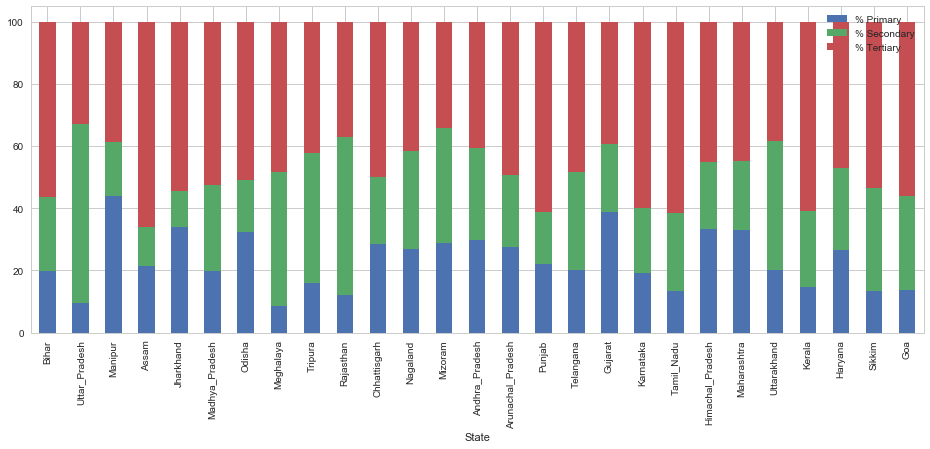

In [35]:
frame_plot = frame.sort_values(by='Gross State Domestic Product')
frame_plot[['% Primary','% Secondary', '% Tertiary']].plot(x=frame['State'], kind='bar', stacked=True, figsize=(16, 6))

# Which plot will you use here? Why?

In [36]:
#We will use a Stacked Bar chart because it clearly shows the contribution of each sector for each state.
#We have three variables here. 

# Why is (Primary + Secondary + Tertiary) not equal to total GDP?

In [37]:
#Because of the taxes and Subsidaries on the GSDP.

# Can you draw any insight from this? Find correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP.

In [38]:
frame_plot['GSDP Rank'] = frame_plot['Per Capita GSDP (Rs.)'].rank(pct=True) 

In [39]:
frame_plot

,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Gross State Domestic Product,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Population ('00),...,Subsidies on products,TOTAL GSVA at basic prices,Taxes on Products,Tertiary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",% Primary,% Secondary,% Tertiary,GSDP Rank
9,217010,133228,128365,23168,1155933,8479,8588,186222,97687,11833,...,20440,1133289,43084,637619,114315,52587,19.9065,23.8308,56.2627,0.481481
21,137447,82058,212499,21079,1520933,550697,1329,149265,240274,6330,...,18400,1467133,72200,483103,70568,47347,9.45899,57.6126,32.9284,0.962963
11,686117,147842,113527,25207,1676119,26120,30842,218728,112718,14870,...,30272,1636292,70099,631844,60421,35203,43.8161,17.5695,38.6144,0.555556
12,383140,NaN,NaN,NaN,1.80428e+06,NaN,NaN,NaN,58442,30873,...,69137,1.78065e+06,92766,1.17733e+06,NaN,NaN,21.5169,12.3648,66.1183,0.111111
5,607897,156072,37944,60393,1841424,18346,8280,259186,89607,20550,...,37745,1821495,57674,992956,140781,77521,33.8281,11.6586,54.5132,0.444444
14,366521,150256,54473,64091,2.44081e+06,433213,84529,214211,76228,32020,...,62112,2.28965e+06,213272,1.20066e+06,383974,148189,19.6995,27.862,52.4384,0.296296
13,799825,177899,77870,86094,2.96666e+06,228625,142391,323287,77358,38350,...,94002,2.91132e+06,149345,1.48471e+06,390423,155956,32.3639,16.6383,50.9978,0.333333
6,308507,165819,204110,233618,4063307,1177608,3622,180431,271793,14950,...,61854,3597882,527279,1738217,380927,189656,8.67535,43.0124,48.3122,1.000000
28,1514981,808256,767268,362521,10436879,2543637,33385,923164,147330,70840,...,259291,9800853,895317,4133326,615496,552234,15.7983,42.0286,42.1731,0.777778
23,1.60142e+06,1.34273e+06,433880,385030,1.61985e+07,5.86625e+06,244549,982430,153076,105820,...,313139,1.50768e+07,1.43486e+06,5.58798e+06,1.74311e+06,1.06669e+06,12.2438,50.6928,37.0634,0.851852


In [40]:
frame_plot.sort_values(by='GSDP Rank', ascending=True, inplace=True)

# Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.

In [41]:
frame_plot

,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Gross State Domestic Product,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Population ('00),...,Subsidies on products,TOTAL GSVA at basic prices,Taxes on Products,Tertiary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",% Primary,% Secondary,% Tertiary,GSDP Rank
4,7951890,3449763,345168,1178022,37391988,2189965,68107,4587589,33954,1101240,...,2006421,36184863,3213546,22179969,7448373,3147173,22.164,16.5398,61.2963,0.037037
17,25097754,11256450,2030625,3392275,104337115,12261649,901501,5034623,49450,2109940,...,3287219,97516938,10107396,45968959,9437243,7404509,26.6613,26.1993,47.1395,0.074074
12,383140,NaN,NaN,NaN,1.80428e+06,NaN,NaN,NaN,58442,30873,...,69137,1.78065e+06,92766,1.17733e+06,NaN,NaN,21.5169,12.3648,66.1183,0.111111
3,3855548,1733568,296587,543651,19809800,2002936,1471149,1795658,60621,326780,...,582406,18666897,1725309,9307109,2987155,1194568,28.5355,21.6056,49.8589,0.148148
29,3211065,1789834,337489,551441,21710718,4114148,2037289,1375410,62091,349660,...,411619,19623166,2499171,8133341,1991359,1470022,26.7457,31.8066,41.4476,0.185185
8,16235647,4403151,1272905,1988794,48198169,4368833,1618373,2747805,62989,765180,...,2102800,46016269,4284700,18117360,5357515,2865802,38.7994,21.829,39.3716,0.222222
2,6422978,2402396,833067,1065147,32197092,5754229,2586328,2340603,73979,435220,...,1209349,30255256,3151184,12256258,3149555,2034016,29.7777,29.7128,40.5095,0.259259
14,366521,150256,54473,64091,2.44081e+06,433213,84529,214211,76228,32020,...,62112,2.28965e+06,213272,1.20066e+06,383974,148189,19.6995,27.862,52.4384,0.296296
13,799825,177899,77870,86094,2.96666e+06,228625,142391,323287,77358,38350,...,94002,2.91132e+06,149345,1.48471e+06,390423,155956,32.3639,16.6383,50.9978,0.333333
0,15044394,5353326,1122888,1827413,61219447,6552580,4069385,4164287,84837,721610,...,2333442,58158386,5394503,26015812,7297290,3814461,32.865,22.4023,44.7327,0.370370


In [42]:
q = frame_plot.quantile([.2, .5, .85, 1], axis = 0)
q

,GSDP Rank
0.20,0.229630
0.50,0.518519
0.85,0.855556
1.00,1.000000


In [43]:
conditions = [
    (frame_plot['GSDP Rank'] <= 0.229630),
    (frame_plot['GSDP Rank'] <= 0.518519),
    (frame_plot['GSDP Rank'] <= 0.855556),
    (frame_plot['GSDP Rank'] <= 1.000000)
]
choices = ['C4', 'C3', 'C2', 'C1']
frame_plot['Category'] = np.select(conditions, choices)

In [44]:
frame_plot

,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Gross State Domestic Product,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Population ('00),...,TOTAL GSVA at basic prices,Taxes on Products,Tertiary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",% Primary,% Secondary,% Tertiary,GSDP Rank,Category
4,7951890,3449763,345168,1178022,37391988,2189965,68107,4587589,33954,1101240,...,36184863,3213546,22179969,7448373,3147173,22.164,16.5398,61.2963,0.037037,C4
17,25097754,11256450,2030625,3392275,104337115,12261649,901501,5034623,49450,2109940,...,97516938,10107396,45968959,9437243,7404509,26.6613,26.1993,47.1395,0.074074,C4
12,383140,NaN,NaN,NaN,1.80428e+06,NaN,NaN,NaN,58442,30873,...,1.78065e+06,92766,1.17733e+06,NaN,NaN,21.5169,12.3648,66.1183,0.111111,C4
3,3855548,1733568,296587,543651,19809800,2002936,1471149,1795658,60621,326780,...,18666897,1725309,9307109,2987155,1194568,28.5355,21.6056,49.8589,0.148148,C4
29,3211065,1789834,337489,551441,21710718,4114148,2037289,1375410,62091,349660,...,19623166,2499171,8133341,1991359,1470022,26.7457,31.8066,41.4476,0.185185,C4
8,16235647,4403151,1272905,1988794,48198169,4368833,1618373,2747805,62989,765180,...,46016269,4284700,18117360,5357515,2865802,38.7994,21.829,39.3716,0.222222,C4
2,6422978,2402396,833067,1065147,32197092,5754229,2586328,2340603,73979,435220,...,30255256,3151184,12256258,3149555,2034016,29.7777,29.7128,40.5095,0.259259,C3
14,366521,150256,54473,64091,2.44081e+06,433213,84529,214211,76228,32020,...,2.28965e+06,213272,1.20066e+06,383974,148189,19.6995,27.862,52.4384,0.296296,C3
13,799825,177899,77870,86094,2.96666e+06,228625,142391,323287,77358,38350,...,2.91132e+06,149345,1.48471e+06,390423,155956,32.3639,16.6383,50.9978,0.333333,C3
0,15044394,5353326,1122888,1827413,61219447,6552580,4069385,4164287,84837,721610,...,58158386,5394503,26015812,7297290,3814461,32.865,22.4023,44.7327,0.370370,C3


In [45]:
C1 = frame_plot[frame_plot['Category'] == 'C1']
C2 = frame_plot[frame_plot['Category'] == 'C2']
C3 = frame_plot[frame_plot['Category'] == 'C3']
C4 = frame_plot[frame_plot['Category'] == 'C4']

In [46]:
df_cat = [C1, C2, C3, C4]

In [47]:
df_cat

[   Agriculture, forestry and fishing Construction  \
 7                            5930617      7314003   
 16                       8.01524e+06  3.70257e+06   
 21                            137447        82058   
 6                             308507       165819   
 
    Electricity, gas, water supply & other utility services Financial services  \
 7                                              482470                 2010306   
 16                                        1.10192e+06             1.67149e+06   
 21                                             212499                   21079   
 6                                              204110                  233618   
 
    Gross State Domestic Product Manufacturing Mining and quarrying  \
 7                      52600230       4273567               558824   
 16                  4.37462e+07   7.75692e+06                25186   
 21                      1520933        550697                 1329   
 6                       4063307

In [48]:
frame.columns

Index(['Agriculture, forestry and fishing', 'Construction',
       'Electricity, gas, water supply & other utility services',
       'Financial services', 'Gross State Domestic Product', 'Manufacturing',
       'Mining and quarrying', 'Other services', 'Per Capita GSDP (Rs.)',
       'Population ('00)', 'Primary', 'Public administration',
       'Real estate, ownership of dwelling & professional services',
       'Secondary', 'State', 'Subsidies on products',
       'TOTAL GSVA at basic prices', 'Taxes on Products', 'Tertiary',
       'Trade, repair, hotels and restaurants',
       'Transport, storage, communication & services related to broadcasting',
       '% Primary', '% Secondary', '% Tertiary'],
      dtype='object')

In [49]:
frame

,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Gross State Domestic Product,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Population ('00),...,State,Subsidies on products,TOTAL GSVA at basic prices,Taxes on Products,Tertiary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",% Primary,% Secondary,% Tertiary
4,7951890,3449763,345168,1178022,37391988,2189965,68107,4587589,33954,1101240,...,Bihar,2006421,36184863,3213546,22179969,7448373,3147173,22.164,16.5398,61.2963
17,25097754,11256450,2030625,3392275,104337115,12261649,901501,5034623,49450,2109940,...,Uttar_Pradesh,3287219,97516938,10107396,45968959,9437243,7404509,26.6613,26.1993,47.1395
12,383140,NaN,NaN,NaN,1.80428e+06,NaN,NaN,NaN,58442,30873,...,Manipur,69137,1.78065e+06,92766,1.17733e+06,NaN,NaN,21.5169,12.3648,66.1183
3,3855548,1733568,296587,543651,19809800,2002936,1471149,1795658,60621,326780,...,Assam,582406,18666897,1725309,9307109,2987155,1194568,28.5355,21.6056,49.8589
29,3211065,1789834,337489,551441,21710718,4114148,2037289,1375410,62091,349660,...,Jharkhand,411619,19623166,2499171,8133341,1991359,1470022,26.7457,31.8066,41.4476
8,16235647,4403151,1272905,1988794,48198169,4368833,1618373,2747805,62989,765180,...,Madhya_Pradesh,2102800,46016269,4284700,18117360,5357515,2865802,38.7994,21.829,39.3716
2,6422978,2402396,833067,1065147,32197092,5754229,2586328,2340603,73979,435220,...,Odisha,1209349,30255256,3151184,12256258,3149555,2034016,29.7777,29.7128,40.5095
14,366521,150256,54473,64091,2.44081e+06,433213,84529,214211,76228,32020,...,Meghalaya,62112,2.28965e+06,213272,1.20066e+06,383974,148189,19.6995,27.862,52.4384
13,799825,177899,77870,86094,2.96666e+06,228625,142391,323287,77358,38350,...,Tripura,94002,2.91132e+06,149345,1.48471e+06,390423,155956,32.3639,16.6383,50.9978
0,15044394,5353326,1122888,1827413,61219447,6552580,4069385,4164287,84837,721610,...,Rajasthan,2333442,58158386,5394503,26015812,7297290,3814461,32.865,22.4023,44.7327


In [50]:
#This value was calculated during iteration of the dataframe.
sub_sectors

['Agriculture, forestry and fishing',
 'Mining and quarrying',
 'Primary',
 'Manufacturing',
 'Electricity, gas, water supply & other utility services',
 'Construction',
 'Secondary',
 'Trade, repair, hotels and restaurants',
 'Transport, storage, communication & services related to broadcasting',
 'Financial services',
 'Real estate, ownership of dwelling & professional services',
 'Public administration',
 'Other services',
 'Tertiary',
 'TOTAL GSVA at basic prices',
 'Taxes on Products',
 'Subsidies on products',
 'Gross State Domestic Product',
 "Population ('00)",
 'Per Capita GSDP (Rs.)']

In [51]:
sub_sectors_list = sub_sectors[:-6]
sub_sectors_list = list(set(sub_sectors_list) - set(['Primary', 'Secondary', 'Tertiary']))

In [52]:
sub_sectors_list

['Transport, storage, communication & services related to broadcasting',
 'Construction',
 'Real estate, ownership of dwelling & professional services',
 'Other services',
 'Public administration',
 'Agriculture, forestry and fishing',
 'Manufacturing',
 'Financial services',
 'Mining and quarrying',
 'Trade, repair, hotels and restaurants',
 'Electricity, gas, water supply & other utility services']

In [53]:
#Add Percentage contribution
ls = []
final_list = []
for d in df_cat:
    for s in sub_sectors_list:
        ls.append((s, 
        (d[s].sum(axis = 0, skipna = True) /  d['TOTAL GSVA at basic prices'].sum(axis = 0, skipna = True)) * 100))
    final_list.append(ls)

In [54]:
C1[['State', '% Primary', '% Secondary', '% Tertiary']]

,State,% Primary,% Secondary,% Tertiary
7,Kerala,13.4543,25.0243,61.5214
16,Haryana,20.1877,31.5388,48.2735
21,Sikkim,9.45899,57.6126,32.9284
6,Goa,8.67535,43.0124,48.3122


In [55]:
C2[['State', '% Primary', '% Secondary', '% Tertiary']]

,State,% Primary,% Secondary,% Tertiary
11,Arunachal_Pradesh,43.8161,17.5695,38.6144
15,Punjab,27.4068,23.3054,49.2877
1,Telangana,19.2165,20.88,59.9035
25,Gujarat,20.077,41.7327,38.1903
24,Karnataka,14.5305,24.6677,60.8018
20,Tamil_Nadu,13.3947,33.0018,53.6035
28,Himachal_Pradesh,15.7983,42.0286,42.1731
27,Maharashtra,13.7856,30.0601,56.1544
23,Uttarakhand,12.2438,50.6928,37.0634


In [56]:
C3[['State', '% Primary', '% Secondary', '% Tertiary']]

,State,% Primary,% Secondary,% Tertiary
2,Odisha,29.7777,29.7128,40.5095
14,Meghalaya,19.6995,27.862,52.4384
13,Tripura,32.3639,16.6383,50.9978
0,Rajasthan,32.865,22.4023,44.7327
10,Chhattisgarh,28.7956,37.0645,34.1399
5,Nagaland,33.8281,11.6586,54.5132
9,Mizoram,19.9065,23.8308,56.2627
18,Andhra_Pradesh,33.3918,21.4824,45.1259


In [57]:
C4[['State', '% Primary', '% Secondary', '% Tertiary']]

,State,% Primary,% Secondary,% Tertiary
4,Bihar,22.164,16.5398,61.2963
17,Uttar_Pradesh,26.6613,26.1993,47.1395
12,Manipur,21.5169,12.3648,66.1183
3,Assam,28.5355,21.6056,49.8589
29,Jharkhand,26.7457,31.8066,41.4476
8,Madhya_Pradesh,38.7994,21.829,39.3716


In [58]:
ls

[('Transport, storage, communication & services related to broadcasting',
  7.32181169395949),
 ('Construction', 12.095836812733726),
 ('Real estate, ownership of dwelling & professional services',
  15.828165802284927),
 ('Other services', 8.654793849728001),
 ('Public administration', 3.834875329709495),
 ('Agriculture, forestry and fishing', 15.454013080977719),
 ('Manufacturing', 14.77427660417566),
 ('Financial services', 4.227026115975059),
 ('Mining and quarrying', 0.6324299466582498),
 ('Trade, repair, hotels and restaurants', 15.028087869729445),
 ('Electricity, gas, water supply & other utility services',
  2.148683967874383),
 ('Transport, storage, communication & services related to broadcasting',
  6.398261100848527),
 ('Construction', 7.707069158898143),
 ('Real estate, ownership of dwelling & professional services',
  17.464308670903197),
 ('Other services', 6.872938754099131),
 ('Public administration', 3.5200712383979127),
 ('Agriculture, forestry and fishing', 14.2580

In [59]:
sector_wise = pd.DataFrame(ls, columns =['Sector', 'Contribution'])

In [60]:
final_df = sector_wise.groupby('Sector').agg('sum')
final_df

,Contribution
Sector,
"Agriculture, forestry and fishing",80.717039
Construction,39.471372
"Electricity, gas, water supply & other utility services",9.464990
Financial services,18.030620
Manufacturing,59.969326
Mining and quarrying,11.837117
Other services,30.244013
Public administration,18.085115
"Real estate, ownership of dwelling & professional services",53.899239


In [61]:
#Only Agriculture is a sector contributing 80%, individually no section in every category contributes 80%

In [62]:
sector_wise

,Sector,Contribution
0,"Transport, storage, communication & services r...",7.321812
1,Construction,12.095837
2,"Real estate, ownership of dwelling & professio...",15.828166
3,Other services,8.654794
4,Public administration,3.834875
5,"Agriculture, forestry and fishing",15.454013
6,Manufacturing,14.774277
7,Financial services,4.227026
8,Mining and quarrying,0.632430
9,"Trade, repair, hotels and restaurants",15.028088


In [63]:
C1_plot = sector_wise.loc[0: 12]

In [64]:
C2_plot = sector_wise.loc[12: 22]

In [65]:
C3_plot = sector_wise.loc[22: 33]

In [66]:
C4_plot = sector_wise.loc[33: 44]

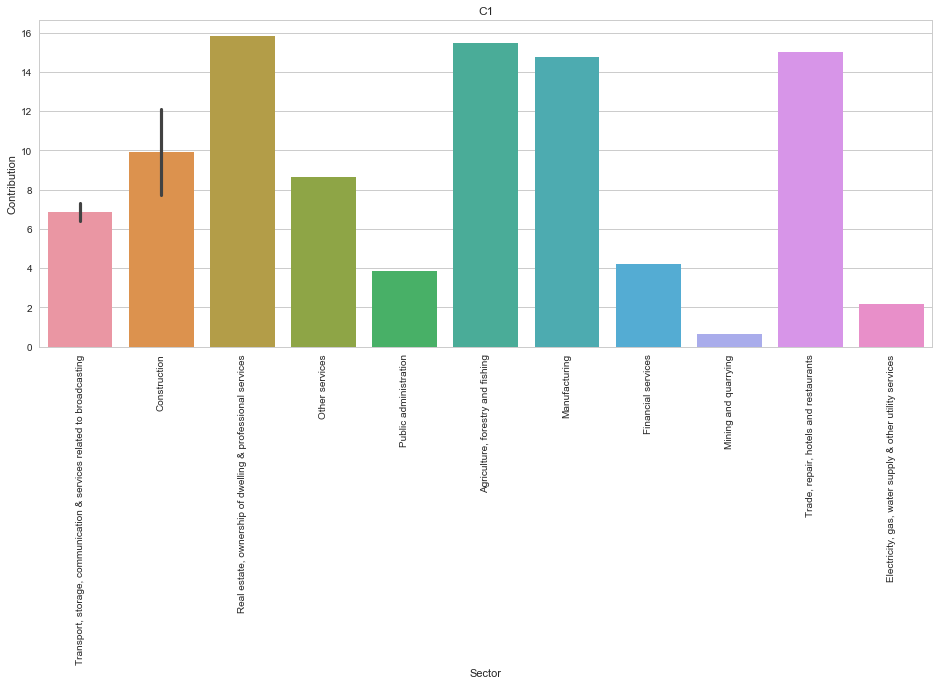

In [67]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
plt.title('C1')
sns.set(style="whitegrid")
ax2 = sns.barplot(x="Sector", y="Contribution", data=C1_plot)

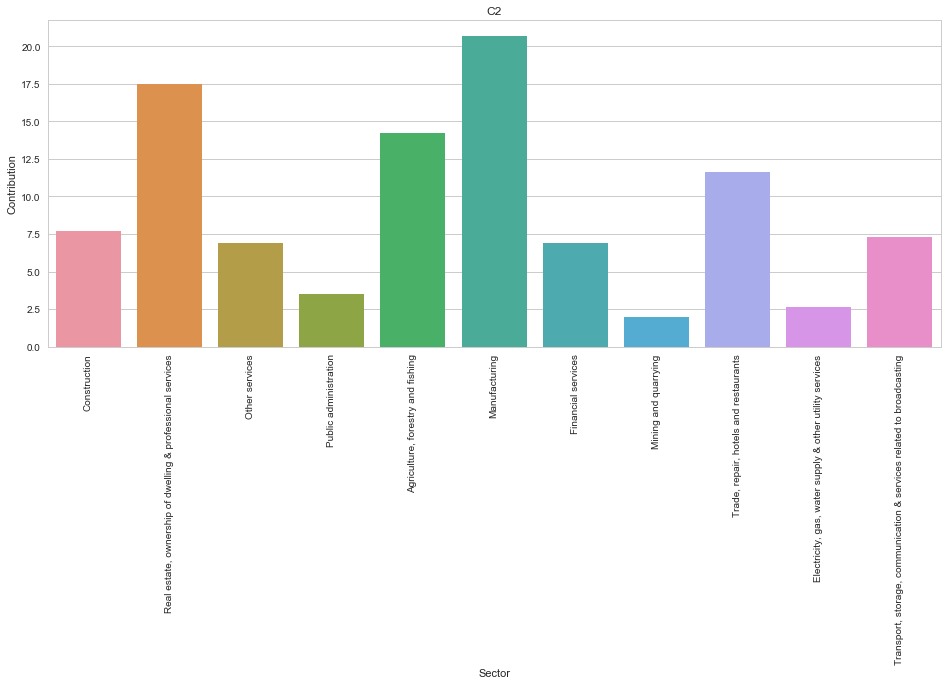

In [68]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
plt.title('C2')
sns.set(style="whitegrid")
ax2 = sns.barplot(x="Sector", y="Contribution", data=C2_plot)

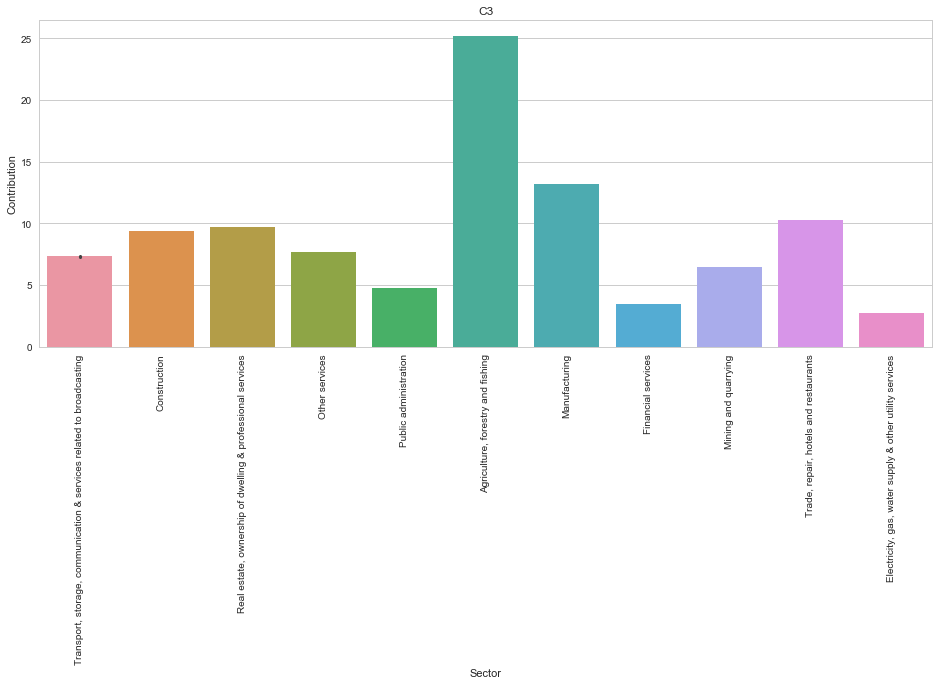

In [69]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
plt.title('C3')
sns.set(style="whitegrid")
ax2 = sns.barplot(x="Sector", y="Contribution", data=C3_plot)

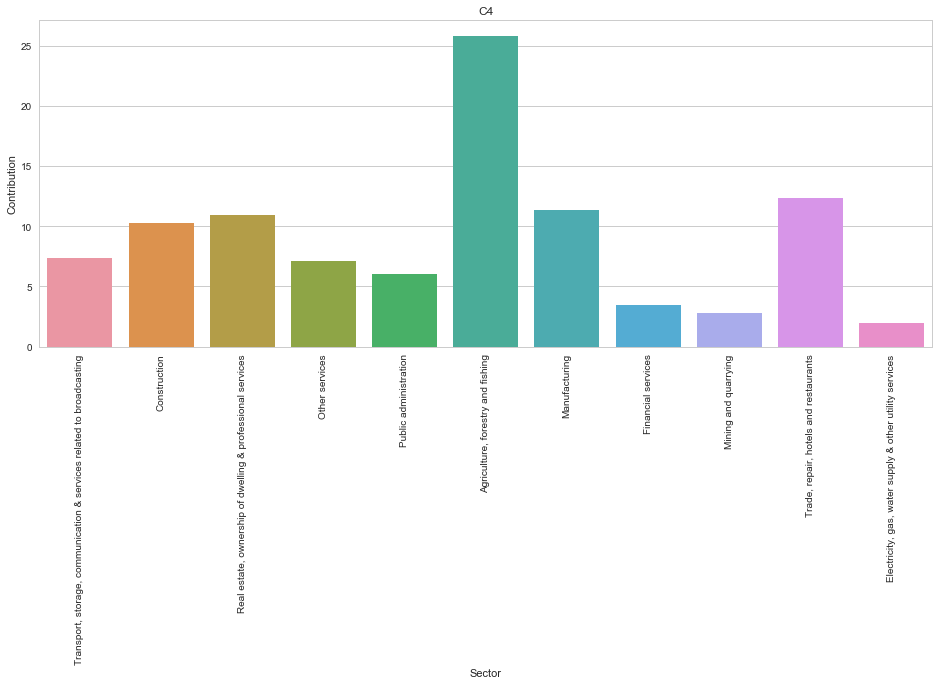

In [70]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
plt.title('C4')
sns.set(style="whitegrid")
ax2 = sns.barplot(x="Sector", y="Contribution", data=C4_plot)

# How does the GDP distribution of the top states (C1) differ from the others?

In [71]:
#C1 has more contribution of Manufacturing industry over others.
#C1 doesn't really focus on Mining Industry and Mining doesn't impact GDP by a long margin.

# Which sub-sectors seem to be correlated with high GDP?

In [72]:
C4['Per Capita GSDP (Rs.)'].astype('float64').corr(C4['% Primary'].astype('float64'))
#Positive Correlation

0.5340813210142019

# Which sub-sectors do the various categories need to focus on? 

In [73]:
#C1: Manufacturing.
#C2: Real Estate.
#C3: Agriculture.
#C4: Agriculture.

# Finally, provide at least two recommendations for each category to improve the per capita GDP.

In [74]:
#C1: C1 category states should continue investing in Manufacturing and should focus on agriculture, trade and real Estate as its a next potential candidate.
#C2: C2 category states should continue investing in Real Estate and should focus on trade, agriculture and manufacturing as its a next potential candidate.
#C3: C3 category states should continue investing in Agriculture and should focus on agriculture, manufacturing and trade as its a next potential candidate.
#C4: C4 category states should continue investing in Agriculture and should focus on trade, manufacturing and real estate as its a next potential candidate.

# Part-II: GDP and Education Dropout Rates

In [75]:
df_b = pd.read_csv('rs_session243_au570_1.1.csv')

In [76]:
df_b = df_b[['Level of Education - State', 'Primary - 2014-2015', 
             'Upper Primary - 2014-2015', 'Secondary - 2014-2015']]

In [77]:
df_b.columns = ['State', 'Primary - 2014-2015', 'Upper Primary - 2014-2015', 'Secondary - 2014-2015']

In [78]:
result = pd.merge(frame_plot, df_b, on='State')

In [79]:
result

,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Gross State Domestic Product,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Population ('00),...,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",% Primary,% Secondary,% Tertiary,GSDP Rank,Category,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,7951890,3449763,345168,1178022,37391988,2189965,68107,4587589,33954,1101240,...,7448373,3147173,22.164,16.5398,61.2963,0.037037,C4,2.09,4.08,25.90
1,383140,NaN,NaN,NaN,1.80428e+06,NaN,NaN,NaN,58442,30873,...,NaN,NaN,21.5169,12.3648,66.1183,0.111111,C4,18.00,4.20,14.38
2,3855548,1733568,296587,543651,19809800,2002936,1471149,1795658,60621,326780,...,2987155,1194568,28.5355,21.6056,49.8589,0.148148,C4,7.44,10.51,27.06
3,3211065,1789834,337489,551441,21710718,4114148,2037289,1375410,62091,349660,...,1991359,1470022,26.7457,31.8066,41.4476,0.185185,C4,6.41,8.99,24.00
4,6422978,2402396,833067,1065147,32197092,5754229,2586328,2340603,73979,435220,...,3149555,2034016,29.7777,29.7128,40.5095,0.259259,C3,2.94,3.81,29.56
5,366521,150256,54473,64091,2.44081e+06,433213,84529,214211,76228,32020,...,383974,148189,19.6995,27.862,52.4384,0.296296,C3,10.34,6.52,20.52
6,799825,177899,77870,86094,2.96666e+06,228625,142391,323287,77358,38350,...,390423,155956,32.3639,16.6383,50.9978,0.333333,C3,3.58,1.99,28.42
7,15044394,5353326,1122888,1827413,61219447,6552580,4069385,4164287,84837,721610,...,7297290,3814461,32.865,22.4023,44.7327,0.370370,C3,8.39,3.07,13.48
8,607897,156072,37944,60393,1841424,18346,8280,259186,89607,20550,...,140781,77521,33.8281,11.6586,54.5132,0.444444,C3,19.41,7.92,18.23
9,217010,133228,128365,23168,1155933,8479,8588,186222,97687,11833,...,114315,52587,19.9065,23.8308,56.2627,0.481481,C3,12.96,4.78,21.88


In [80]:
result.columns

Index(['Agriculture, forestry and fishing', 'Construction',
       'Electricity, gas, water supply & other utility services',
       'Financial services', 'Gross State Domestic Product', 'Manufacturing',
       'Mining and quarrying', 'Other services', 'Per Capita GSDP (Rs.)',
       'Population ('00)', 'Primary', 'Public administration',
       'Real estate, ownership of dwelling & professional services',
       'Secondary', 'State', 'Subsidies on products',
       'TOTAL GSVA at basic prices', 'Taxes on Products', 'Tertiary',
       'Trade, repair, hotels and restaurants',
       'Transport, storage, communication & services related to broadcasting',
       '% Primary', '% Secondary', '% Tertiary', 'GSDP Rank', 'Category',
       'Primary - 2014-2015', 'Upper Primary - 2014-2015',
       'Secondary - 2014-2015'],
      dtype='object')

# Analyse if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state. Choose an appropriate plot to conduct this analysis.

In [81]:
corr_dict = {}

corr_dict['Primary-%Primary'] = result['Primary - 2014-2015'].astype('float64').corr(result['% Primary'].astype('float64'))
corr_dict['Primary-%Secondary'] = result['Primary - 2014-2015'].astype('float64').corr(result['% Secondary'].astype('float64'))
corr_dict['Primary-%Tertiary'] = result['Primary - 2014-2015'].astype('float64').corr(result['% Tertiary'].astype('float64'))

corr_dict['UpperPrimary-%Primary'] = result['Upper Primary - 2014-2015'].astype('float64').corr(result['% Primary'].astype('float64'))
corr_dict['UpperPrimary-%Secondary'] = result['Upper Primary - 2014-2015'].astype('float64').corr(result['% Secondary'].astype('float64'))
corr_dict['Primary-%Tertiary'] = result['Upper Primary - 2014-2015'].astype('float64').corr(result['% Tertiary'].astype('float64'))

corr_dict['Secondary-%Primary'] = result['Secondary - 2014-2015'].astype('float64').corr(result['% Primary'].astype('float64'))
corr_dict['Secondary-%Secondary'] = result['Secondary - 2014-2015'].astype('float64').corr(result['% Secondary'].astype('float64'))
corr_dict['Secondary-%Tertiary'] = result['Secondary - 2014-2015'].astype('float64').corr(result['% Tertiary'].astype('float64'))

In [82]:
corr_dict

{'Primary-%Primary': 0.36301026077785986,
 'Primary-%Secondary': -0.5096106449787003,
 'Primary-%Tertiary': -0.06515935071709979,
 'Secondary-%Primary': 0.3621169313600263,
 'Secondary-%Secondary': -0.13160751629987422,
 'Secondary-%Tertiary': -0.14818162032836496,
 'UpperPrimary-%Primary': 0.4590137648476221,
 'UpperPrimary-%Secondary': -0.25597930479685266}

# You have the total population of each state from the data in part I. Is there any correlation between dropout rates and population? What is the expected trend and what is the observation?

In [83]:
corr_dict_2 = {}

corr_dict_2['Population-Primary'] = result['Population (\'00)'].astype('float64').corr(result['Primary - 2014-2015'].astype('float64'))
corr_dict_2['Population-Secondary'] = result['Population (\'00)'].astype('float64').corr(result['Upper Primary - 2014-2015'].astype('float64'))
corr_dict_2['Population-Tertiary'] = result['Population (\'00)'].astype('float64').corr(result['Secondary - 2014-2015'].astype('float64'))

In [84]:
corr_dict_2

{'Population-Primary': -0.47161612744746617,
 'Population-Secondary': -0.08599048347994273,
 'Population-Tertiary': 0.10502089298475188}

# Write down the key insights you draw from this data:

In [85]:
result_f = result.dropna()

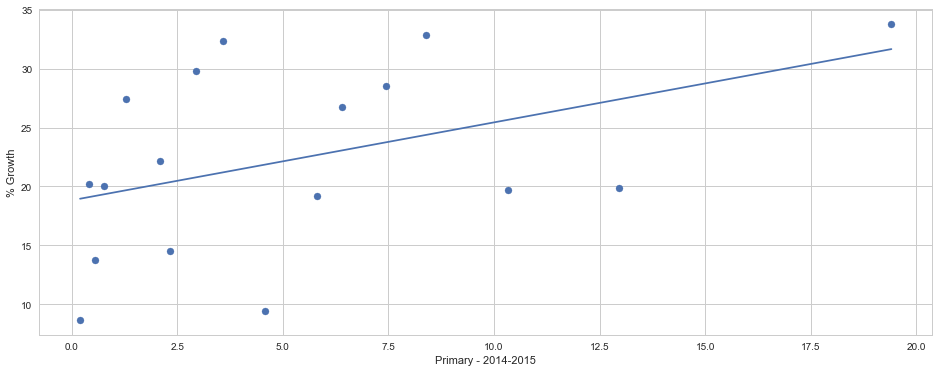

In [86]:
plt.figure(figsize=(16, 6))
plt.xlabel("Primary - 2014-2015")
plt.ylabel("% Growth")
plt.scatter(x='Primary - 2014-2015', y='% Primary', data=result_f[['Primary - 2014-2015', '% Primary']])
plt.plot(np.unique(result_f['Primary - 2014-2015']), 
np.poly1d(np.polyfit(result_f['Primary - 2014-2015'], result_f['% Primary'], 1))
         (np.unique(result_f['Primary - 2014-2015'])))

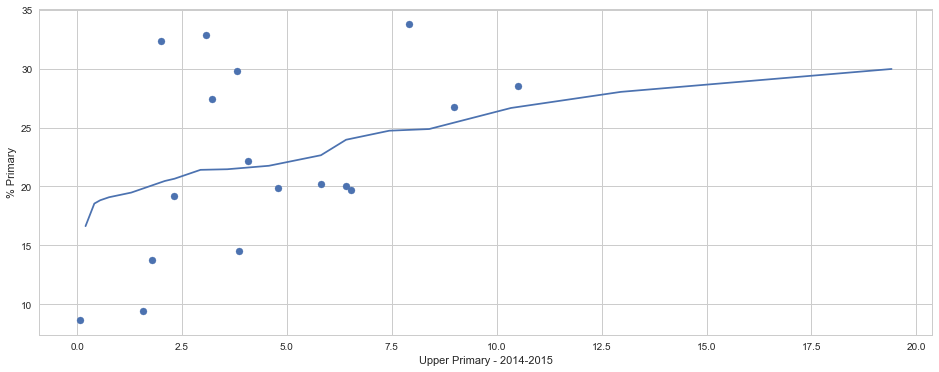

In [87]:
plt.figure(figsize=(16, 6))
plt.xlabel("Upper Primary - 2014-2015")
plt.ylabel("% Primary")
plt.scatter(x='Upper Primary - 2014-2015', y='% Primary', data=result_f[['Upper Primary - 2014-2015', '% Primary']])
plt.plot(np.unique(result_f['Primary - 2014-2015']), 
np.poly1d(np.polyfit(result_f['Upper Primary - 2014-2015'], result_f['% Primary'], 1))
         (np.unique(result_f['Upper Primary - 2014-2015'])))

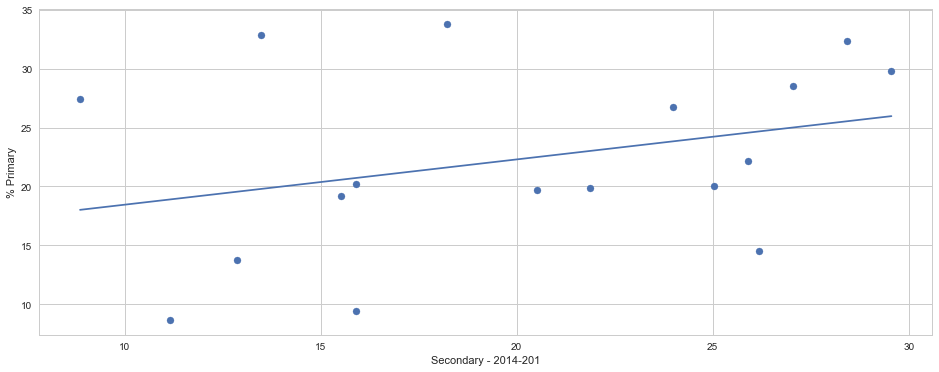

In [88]:
plt.figure(figsize=(16, 6))
plt.xlabel("Secondary - 2014-201")
plt.ylabel("% Primary")
plt.scatter(x='Secondary - 2014-2015', y='% Primary', data=result_f[['Secondary - 2014-2015', '% Primary']])
plt.plot(np.unique(result_f['Secondary - 2014-2015']), 
np.poly1d(np.polyfit(result_f['Secondary - 2014-2015'], result_f['% Primary'], 1))
         (np.unique(result_f['Secondary - 2014-2015'])))

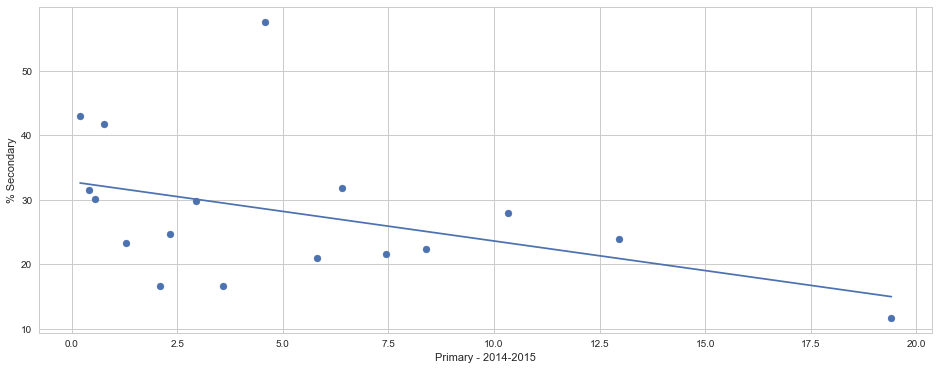

In [89]:
plt.figure(figsize=(16, 6))
plt.xlabel("Primary - 2014-2015")
plt.ylabel("% Secondary")
plt.scatter(x='Primary - 2014-2015', y='% Secondary', data=result_f[['Primary - 2014-2015', '% Secondary']])
plt.plot(np.unique(result_f['Primary - 2014-2015']), 
np.poly1d(np.polyfit(result_f['Primary - 2014-2015'], result_f['% Secondary'], 1))
         (np.unique(result_f['Primary - 2014-2015'])))

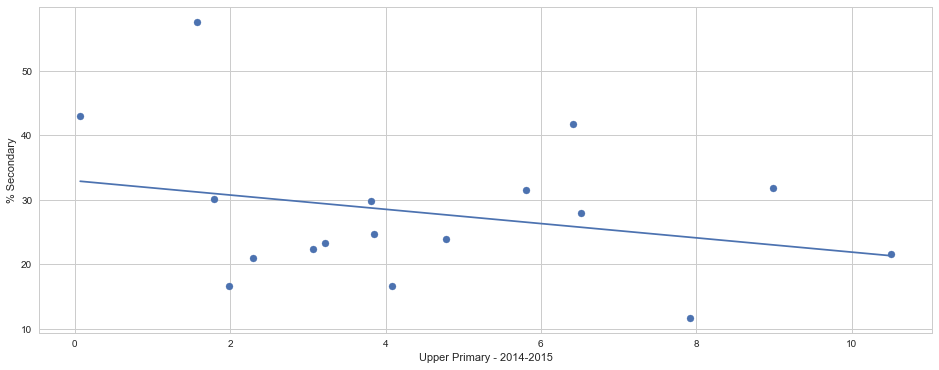

In [90]:
plt.figure(figsize=(16, 6))
plt.xlabel("Upper Primary - 2014-2015")
plt.ylabel("% Secondary")
plt.scatter(x='Upper Primary - 2014-2015', y='% Secondary', data=result_f[['Upper Primary - 2014-2015', '% Secondary']])
plt.plot(np.unique(result_f['Upper Primary - 2014-2015']), 
np.poly1d(np.polyfit(result_f['Upper Primary - 2014-2015'], result_f['% Secondary'], 1))
         (np.unique(result_f['Upper Primary - 2014-2015'])))

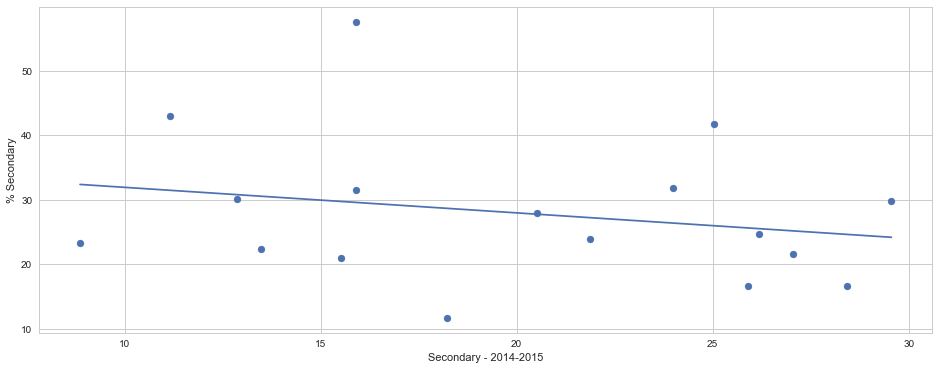

In [91]:
plt.figure(figsize=(16, 6))
plt.xlabel("Secondary - 2014-2015")
plt.ylabel("% Secondary")
plt.scatter(x='Secondary - 2014-2015', y='% Secondary', data=result_f[['Secondary - 2014-2015', '% Secondary']])
plt.plot(np.unique(result_f['Secondary - 2014-2015']), 
np.poly1d(np.polyfit(result_f['Secondary - 2014-2015'], result_f['% Secondary'], 1))
         (np.unique(result_f['Secondary - 2014-2015'])))

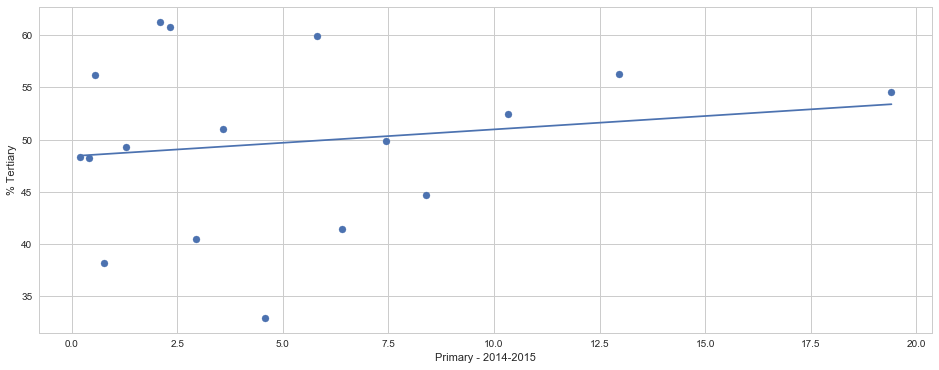

In [92]:
plt.figure(figsize=(16, 6))
plt.xlabel("Primary - 2014-2015")
plt.ylabel("% Tertiary")
plt.scatter(x='Primary - 2014-2015', y='% Tertiary', data=result_f[['Primary - 2014-2015', '% Tertiary']])
plt.plot(np.unique(result_f['Primary - 2014-2015']), 
np.poly1d(np.polyfit(result_f['Primary - 2014-2015'], result_f['% Tertiary'], 1))
         (np.unique(result_f['Primary - 2014-2015'])))

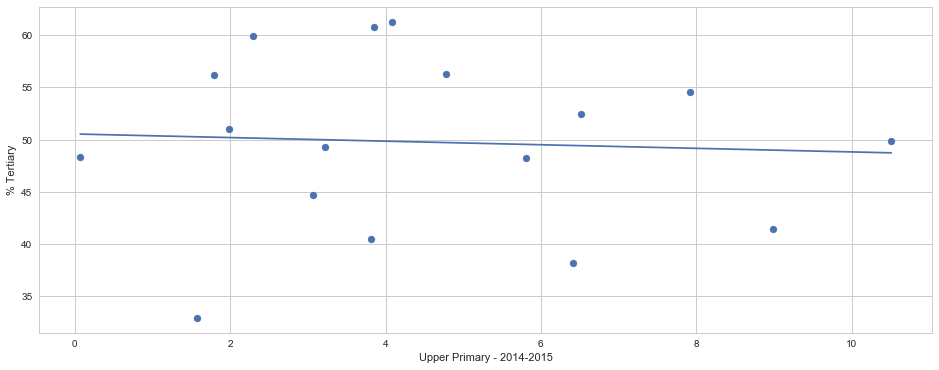

In [93]:
plt.figure(figsize=(16, 6))
plt.xlabel("Upper Primary - 2014-2015")
plt.ylabel("% Tertiary")
plt.scatter(x='Upper Primary - 2014-2015', y='% Tertiary', data=result_f[['Upper Primary - 2014-2015', '% Tertiary']])
plt.plot(np.unique(result_f['Upper Primary - 2014-2015']), 
np.poly1d(np.polyfit(result_f['Upper Primary - 2014-2015'], result_f['% Tertiary'], 1))
         (np.unique(result_f['Upper Primary - 2014-2015'])))

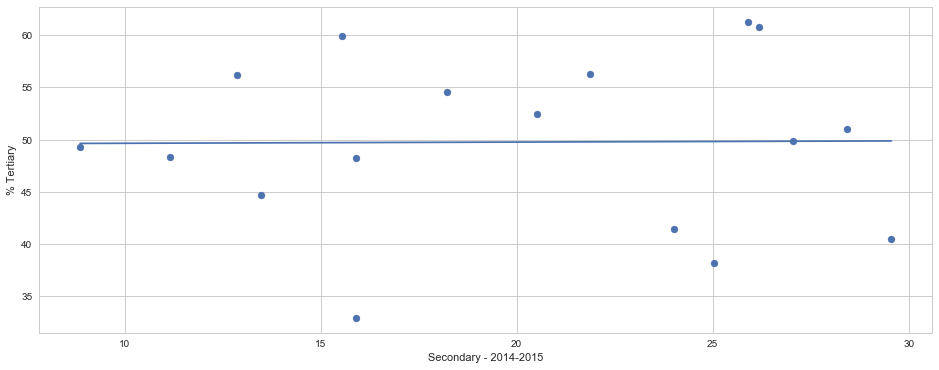

In [94]:
plt.figure(figsize=(16, 6))
plt.xlabel("Secondary - 2014-2015")
plt.ylabel("% Tertiary")
plt.scatter(x='Secondary - 2014-2015', y='% Tertiary', data=result_f[['Secondary - 2014-2015', '% Tertiary']])
plt.plot(np.unique(result_f['Secondary - 2014-2015']), 
np.poly1d(np.polyfit(result_f['Secondary - 2014-2015'], result_f['% Tertiary'], 1))
         (np.unique(result_f['Secondary - 2014-2015'])))

# You have the total population of each state from the data in part I. Is there any correlation between dropout rates and population? What is the expected trend and what is the observation?



In [95]:
corr_dict_2

{'Population-Primary': -0.47161612744746617,
 'Population-Secondary': -0.08599048347994273,
 'Population-Tertiary': 0.10502089298475188}

In [96]:
#On the primary sector there is a negative correlation on dropout rates and hence proves that they are
#inversely proportional. For tertiary its a direct correlation i.e, dropout rate increases with population.

In [ ]:
#END